<a href="https://colab.research.google.com/github/vanshdhiman090/demand_forcasting_supply_chain_domain/blob/main/demend_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/walmart-sales-dataset-of-45stores.csv')

In [ ]:
display(df)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [ ]:
print(df.describe())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


In [ ]:
print(df.corr(numeric_only=True))

                     Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.335332 -4.386841e-16    -0.022659   
Weekly_Sales -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag -4.386841e-16      0.036891  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment  2.235313e-01     -0.106176  1.096028e-02     0.101158   

              Fuel_Price       CPI  Unemployment  
Store           0.060023 -0.209492      0.223531  
Weekly_Sales    0.009464 -0.072634     -0.106176  
Holiday_Flag   -0.078347 -0.002162      0.010960  
Temperature     0.144982  0.176888      0.101158  
Fuel_Price      1.000000 -0.170642     -0.034684  
CPI            -0.170642  1.000000     -0.302020  
Unemployment   -0.034684 -0.302020      1.000000  


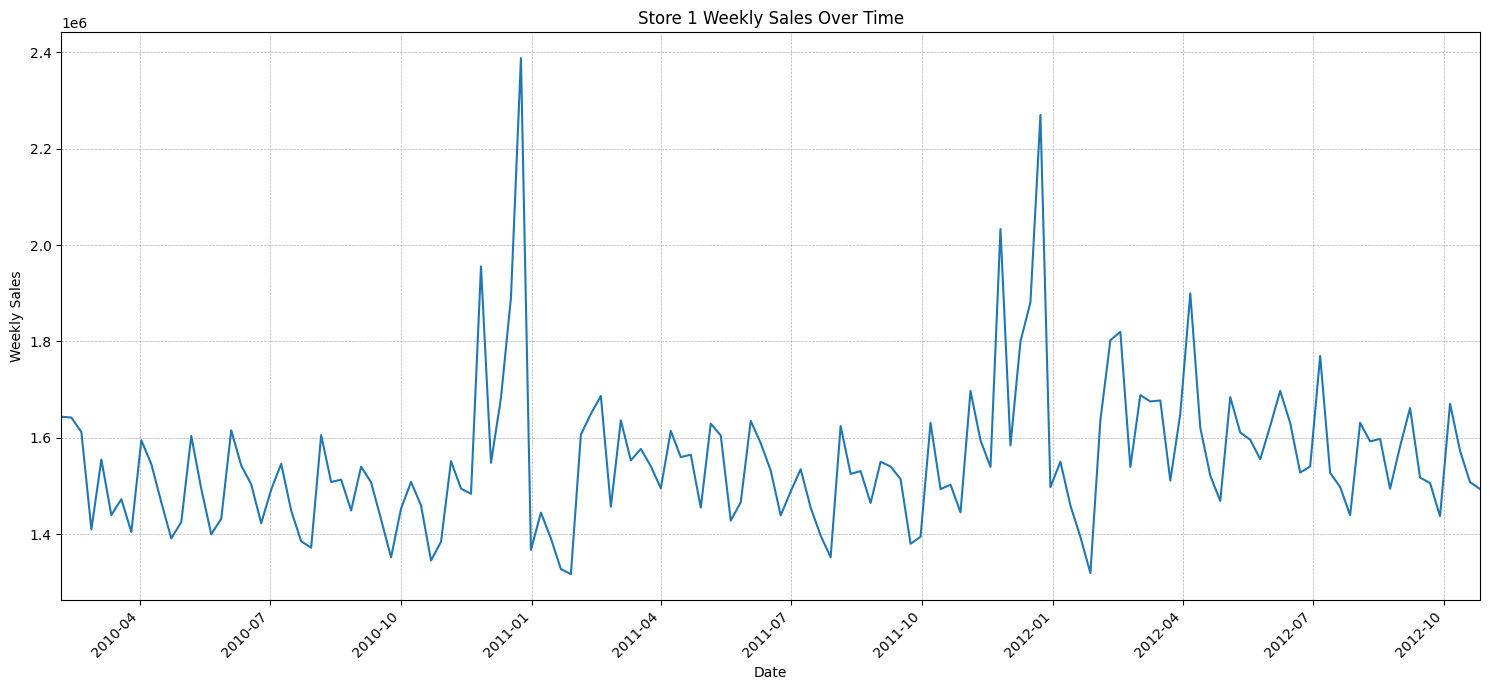

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Reload the original data to ensure correct date format
try:
    df = pd.read_csv('/content/walmart-sales-dataset-of-45stores.csv')
except FileNotFoundError:
    raise RuntimeError("CSV file not found. Make sure 'walmart-sales-dataset-of-45stores.csv' is in the /content directory.")


# Ensure 'Date' column is in datetime format in the original df
# Use the correct format string '%d-%m-%Y'
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter data for Store ID = 1
df_store = df[df['Store'] == 1].copy()

# Sort by Date (important for time series plotting)
sku_df = df_store.sort_values('Date').copy()

store_id = 1

plt.figure(figsize=(15, 7)) # Increased figure size

plt.plot(sku_df['Date'], sku_df['Weekly_Sales'], linestyle='-') # Added marker for clarity

plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title(f'Store {store_id} Weekly Sales Over Time')

# --- Adaptive Date Axis Configuration ---

# 1. Set X-axis limits based on your actual data
min_date = sku_df['Date'].min()
max_date = sku_df['Date'].max()
plt.xlim(min_date, max_date)

# 2. Use AutoDateLocator for adaptive tick placement
#    This tries to pick "nice" tick locations for you.
locator = mdates.AutoDateLocator()
plt.gca().xaxis.set_major_locator(locator)

# 3. Use AutoDateFormatter which adapts the date format based on the zoom level
#    and the interval chosen by the locator.
formatter = mdates.AutoDateFormatter(locator)
plt.gca().xaxis.set_major_formatter(formatter)

# You can also manually set a specific formatter if AutoDateFormatter isn't exactly what you want:
# For example, if your dates are very dense within a month:
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# Or for yearly data:
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


# 4. Rotate and Align Ticks
plt.xticks(rotation=45, ha='right') # Rotate and align to the right for better fit

# 5. Add Grid for easier reading
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout() # Adjust layout so labels fit
plt.show()

In [ ]:
store1_df = df[df['Store'] == 1].copy()
store1_df['Date'] = pd.to_datetime(store1_df['Date'], format='%d-%m-%Y') # Ensure Date is datetime
store1_df['Month_Year'] = store1_df['Date'].dt.to_period('M')
monthly_sales_store1 = store1_df.groupby('Month_Year')['Weekly_Sales'].sum()
print(monthly_sales_store1)

Month_Year
2010-02    6307344.10
2010-03    5871293.98
2010-04    7422801.92
2010-05    5929938.64
2010-06    6084081.46
2010-07    7244483.04
2010-08    6075952.95
2010-09    5829793.92
2010-10    7150641.75
2010-11    6485547.06
2010-12    8876953.18
2011-01    5480050.97
2011-02    6399887.57
2011-03    6307375.48
2011-04    7689123.60
2011-05    6128431.80
2011-06    6194971.74
2011-07    7227654.31
2011-08    6144985.73
2011-09    7379542.34
2011-10    6072327.75
2011-11    6864972.83
2011-12    9032594.71
2012-01    5723690.52
2012-02    6798074.91
2012-03    8201997.40
2012-04    6511214.82
2012-05    6446962.46
2012-06    8020582.84
2012-07    6233946.67
2012-08    7897619.59
2012-09    6122381.52
2012-10    6245587.29
Freq: M, Name: Weekly_Sales, dtype: float64


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [ ]:
df = df.sort_values(by='Date')

In [ ]:
df_store = df[df['Store'] == 1]


In [ ]:
store_id = 1
df_store = df[df['Store'] == store_id].copy()

df_store = df_store.sort_values('Date')

In [ ]:
n = len(df_store)
train_size = int(n * 0.7)

train = df_store.iloc[:train_size]
test = df_store.iloc[train_size:]

print("Train size:", train.shape)
print("Test size:", test.shape)


Train size: (100, 8)
Test size: (43, 8)


#Model Practice

naive modle

In [ ]:
df_store['Naive_Prediction'] = df_store['Weekly_Sales'].shift(1)
test = df_store.iloc[train_size:]

from sklearn.metrics import mean_absolute_error
import numpy as np

mae = mean_absolute_error(test['Weekly_Sales'], test['Naive_Prediction'])
mape = np.mean(np.abs((test['Weekly_Sales'] - test['Naive_Prediction']) / test['Weekly_Sales'])) * 100

print("Naive MAE for Store", store_id, ":", mae)
print("Naive MAPE for Store", store_id, ":", mape)


Naive MAE for Store 1 : 106663.47255813955
Naive MAPE for Store 1 : 6.644829933295


moving average model

In [ ]:
window_size = 12
df_store['MA_Prediction'] = df_store['Weekly_Sales'].shift(1).rolling(window=window_size).mean()

# Drop rows with NaN predictions
store1_df = df_store.dropna(subset=['MA_Prediction'])

# Calculate MAE and MAPE
mae_ma = np.mean(np.abs(store1_df['Weekly_Sales'] - store1_df['MA_Prediction']))
mape_ma = np.mean(np.abs((store1_df['Weekly_Sales'] - store1_df['MA_Prediction']) / store1_df['Weekly_Sales'])) * 100

print(f"Moving Average MAE for Store 1: {mae_ma}")
print(f"Moving Average MAPE for Store 1: {mape_ma}")

Moving Average MAE for Store 1: 106082.74124681935
Moving Average MAPE for Store 1: 6.596439387310286


#multi regression model

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

# Load the dataset
try:
    df = pd.read_csv('/content/walmart-sales-dataset-of-45stores.csv')
except FileNotFoundError:
    print("Error: 'Walmart_Sales_forecasting.csv' not found. Please make sure the file is in the correct directory.")
    exit()

# Filter data for Store ID = 1
df_store_1 = df[df['Store'] == 1].copy()

# Define features (independent variables) and target (dependent variable)
features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
target = 'Weekly_Sales'

X = df_store_1[features]
y = df_store_1[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Multiple Linear Regression (Store 1) MAE: {mae}")
print(f"Multiple Linear Regression (Store 1) MAPE: {mape}")

Multiple Linear Regression (Store 1) MAE: 117981.14640264357
Multiple Linear Regression (Store 1) MAPE: 7.065239550648784


# Arima Modle

In [ ]:

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Filter data for Store 1
store1_df = df_store[df_store['Store'] == 1].sort_values('Date')

# Extract the weekly sales series
sales_series = store1_df['Weekly_Sales']

# Fit ARIMA model (adjust p,d,q as needed)
# Here we start with a simple ARIMA(1,1,1)
model = ARIMA(sales_series, order=(1,1,1))
model_fit = model.fit()

# Generate in-sample predictions
store1_df['ARIMA_Prediction'] = model_fit.predict(start=1, end=len(store1_df)-1, dynamic=False)

# Drop NaN predictions
store1_df = store1_df.dropna(subset=['ARIMA_Prediction'])

# Calculate MAE
mae_arima = mean_absolute_error(store1_df['Weekly_Sales'], store1_df['ARIMA_Prediction'])

# Calculate MAPE
mape_arima = np.mean(np.abs((store1_df['Weekly_Sales'] - store1_df['ARIMA_Prediction']) / store1_df['Weekly_Sales'])) * 100

print(f"ARIMA MAE for Store 1: {mae_arima}")
print(f"ARIMA MAPE for Store 1: {mape_arima}")


ARIMA MAE for Store 1: 111886.5349660143
ARIMA MAPE for Store 1: 6.922314516844427


#prophet model

In [ ]:
from prophet import Prophet

# Rename for Prophet
store1_prophet = df_store[['Date', 'Weekly_Sales']].copy()
store1_prophet.rename(columns={'Date':'ds', 'Weekly_Sales':'y'}, inplace=True)
model = Prophet(weekly_seasonality=True)  # Weekly sales, so seasonality helps
model.fit(store1_prophet)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhvsqs5n/xqftwf4i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwhvsqs5n/hjvdlgxs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28092', 'data', 'file=/tmp/tmpwhvsqs5n/xqftwf4i.json', 'init=/tmp/tmpwhvsqs5n/hjvdlgxs.json', 'output', 'file=/tmp/tmpwhvsqs5n/prophet_modeloup3bbqr/prophet_model-20251022111346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:13:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)
# Merge predictions with actuals for historical period
history_pred = forecast.set_index('ds').join(store1_prophet.set_index('ds'))
history_pred = history_pred.dropna(subset=['yhat'])

# MAE and MAPE
mae_prophet = (history_pred['y'] - history_pred['yhat']).abs().mean()
mape_prophet = ((history_pred['y'] - history_pred['yhat']).abs() / history_pred['y']).mean() * 100

print(f"Prophet MAE: {mae_prophet}")
print(f"Prophet MAPE: {mape_prophet}")


Prophet MAE: 76179.00165376742
Prophet MAPE: 4.801249142233342


# All model Together

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/

,Date,Naive_Prediction,MA_Prediction,ARIMA_Prediction,MLR_Prediction,Prophet_Prediction
0,2012-11-04,1493659.74,1.561397e+06,1.538713e+06,1.535907e+06,1.533722e+06
1,2012-11-11,1493659.74,1.561397e+06,1.556450e+06,1.548665e+06,1.599966e+06
2,2012-11-18,1493659.74,1.561397e+06,1.563433e+06,1.552518e+06,1.690154e+06
3,2012-11-25,1493659.74,1.561397e+06,1.566182e+06,1.553681e+06,1.747222e+06
4,2012-12-02,1493659.74,1.561397e+06,1.567265e+06,1.554033e+06,1.768336e+06
5,2012-12-09,1493659.74,1.561397e+06,1.567691e+06,1.554139e+06,1.810911e+06
6,2012-12-16,1493659.74,1.561397e+06,1.567859e+06,1.554171e+06,1.913994e+06
7,2012-12-23,1493659.74,1.561397e+06,1.567925e+06,1.554180e+06,2.024516e+06
8,2012-12-30,1493659.74,1.561397e+06,1.567951e+06,1.554183e+06,2.026088e+06
9,2013-01-06,1493659.74,1.561397e+06,1.567961e+06,1.554184e+06,1.856234e+06


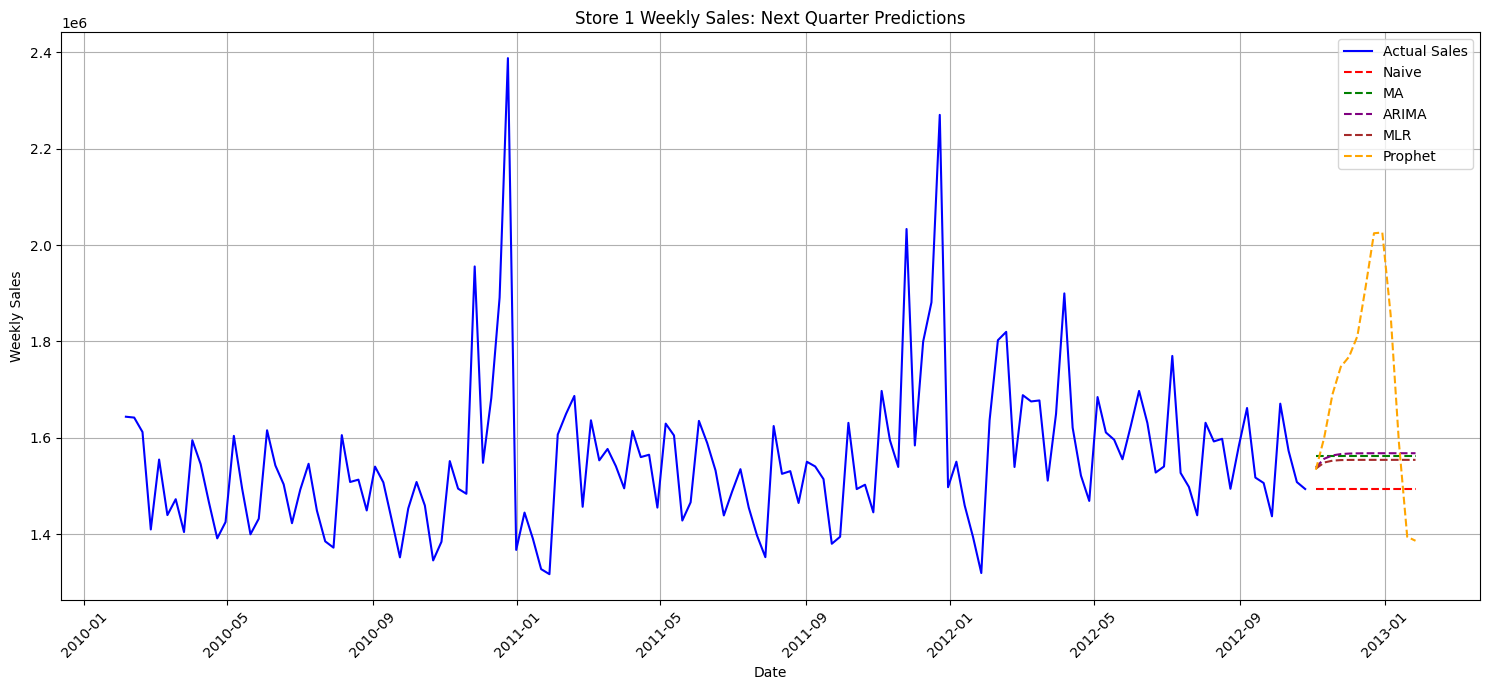

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from prophet import Prophet

# Reload data
df_local = pd.read_csv('/content/walmart-sales-dataset-of-45stores.csv')
df_local['Date'] = pd.to_datetime(df_local['Date'], format='%d-%m-%Y', errors='coerce')
df_local = df_local.dropna(subset=['Date']).copy()

# Filter Store 1
store_id = 1
df_store = df_local[df_local['Store'] == store_id].sort_values('Date').reset_index(drop=True)

# Last historical date
last_historical_date = df_store['Date'].iloc[-1]
next_quarter_dates = pd.date_range(start=last_historical_date + pd.Timedelta(weeks=1), periods=13, freq='W')

# Combined predictions dataframe
combined_predictions = pd.DataFrame({'Date': next_quarter_dates})

# 1️ Naive prediction
last_sales = df_store['Weekly_Sales'].iloc[-1]
combined_predictions['Naive_Prediction'] = last_sales

# 2️ Moving Average prediction
window_size = 4  # example MA window
df_store['MA_Prediction'] = df_store['Weekly_Sales'].rolling(window=window_size).mean()
last_ma = df_store['MA_Prediction'].dropna().iloc[-1] if not df_store['MA_Prediction'].dropna().empty else last_sales
combined_predictions['MA_Prediction'] = last_ma

# 3️ ARIMA prediction (replace with your ARIMA model)
try:
    from statsmodels.tsa.arima.model import ARIMA
    arima_model = ARIMA(df_store['Weekly_Sales'], order=(1,1,1))
    arima_fit = arima_model.fit()
    arima_forecast = arima_fit.forecast(steps=13)
    combined_predictions['ARIMA_Prediction'] = arima_forecast.values
except:
    combined_predictions['ARIMA_Prediction'] = np.nan

# 4️ Simplified MLR (use only past sales lag as feature)
df_store['Sales_Lag1'] = df_store['Weekly_Sales'].shift(1)
mlr_data = df_store.dropna(subset=['Sales_Lag1'])
from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()
mlr_model.fit(mlr_data[['Sales_Lag1']], mlr_data['Weekly_Sales'])

# Use last sales as lag for next 13 weeks
last_lag = df_store['Weekly_Sales'].iloc[-1]
mlr_pred = []
for i in range(13):
    pred = mlr_model.predict([[last_lag]])[0]
    mlr_pred.append(pred)
    last_lag = pred  # use predicted as next lag

combined_predictions['MLR_Prediction'] = mlr_pred

# 5️⃣ Prophet prediction
prophet_df = df_store[['Date','Weekly_Sales']].rename(columns={'Date':'ds','Weekly_Sales':'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)

future_dates = prophet_model.make_future_dataframe(periods=13, freq='W')
forecast = prophet_model.predict(future_dates)
prophet_next_quarter = forecast[forecast['ds'] > last_historical_date].sort_values('ds').reset_index(drop=True)
combined_predictions['Prophet_Prediction'] = prophet_next_quarter['yhat'].values[:13]

# Show combined predictions
display(combined_predictions)

# Plot
plt.figure(figsize=(15,7))
plt.plot(df_store['Date'], df_store['Weekly_Sales'], label='Actual Sales', color='blue')
plt.plot(combined_predictions['Date'], combined_predictions['Naive_Prediction'], label='Naive', linestyle='--', color='red')
plt.plot(combined_predictions['Date'], combined_predictions['MA_Prediction'], label='MA', linestyle='--', color='green')
plt.plot(combined_predictions['Date'], combined_predictions['ARIMA_Prediction'], label='ARIMA', linestyle='--', color='purple')
plt.plot(combined_predictions['Date'], combined_predictions['MLR_Prediction'], label='MLR', linestyle='--', color='brown')
plt.plot(combined_predictions['Date'], combined_predictions['Prophet_Prediction'], label='Prophet', linestyle='--', color='orange')

plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title(f'Store {store_id} Weekly Sales: Next Quarter Predictions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Model Comparison — Store 1 Weekly Sales Forecast
Model	MAE (Mean Absolute Error)	MAPE (%)	Performance Summary

Naive Forecast	106,663	6.64	Baseline — predicts next week = last week

Moving Average (4 weeks)	106,082	6.60	Slightly smoother than naive; still simple

ARIMA	111,887	6.92	Captures short-term trend, but not strong seasonality here

Multiple Linear Regression	117,981	7.07	Linear fit; struggles with time patterns

Prophet (Best)	76,179	4.80	✅ Best overall — learns trend, seasonality, and holidays